# Julia: a fresh approach to technical computing


* Julia is a high-level programming language for technical computing which allows you to manipulate and analyse large data sets
* Other programming languages similar to Julia are Matlab and Python
* Unlike Python, Julia is build from the ground for techical computing
* Unlike Matlab, julia is free and open-source software
* Julia is fast (http://julialang.org/benchmarks/: these are microbenchmark (with explicit loops) to be taken with a grain of salt, and see also benchmarks below)


## Try Julia

* Try julia online at https://juliabox.com/

## Install Julia

* Go to http://julialang.org/downloads/
* Install also a text editor with julia support (e.g. emacs with the julia mode)

### Optionally

* Install Jupyter http://jupyter.org/

# Variable declarations 

## Unicode

* Unicode in in variables names and function
* For example greek letters
* Typed as, e.g. \alpha followed by Tab (in text editor with Julia support)

In [47]:
α = π/2
σ² = 4

4

* Also for function names

In [48]:
function my_serious_function😼(x,y)
    return y,x
end

my_serious_function😼 (generic function with 1 method)

In [49]:
my_serious_function😼(1,2)

(2, 1)

* also for build-in operators

In [50]:
2 ∈ Set([2,3])

true

In [51]:
2 in Set([2,3])

true

* Do not get crazy

In [52]:
𝔳𝔞𝔯𝔦𝔞𝔟𝔩𝔢 = 1.234
שคгเค๒ɭє = 2.345

2.345

# Functions

* Functions are central in julia:
  * functions are "first-class" (e.g. a variable/parameter can hold a function)
  * all operators are defined as functions: `1+2` is in fact `+(1,2)`
  * functions are very flexible due to [multiple dispatch](https://en.wikipedia.org/wiki/Multiple_dispatch)
* There are 3 ways to define a function:

In [53]:
function times_two(x)
    return 2x
end

times_two (generic function with 1 method)

* `return` is actually optional. If it is not present, then the last value of a function is returned.

In [54]:
times2(x) = 2x

times2 (generic function with 1 method)

In [55]:
x -> 2x

#41 (generic function with 1 method)

# Operators

* Julia has all the usual operators: +, -, *, / as most programming languages have

## Additional interesting operators

* Multiply by the inverse of a matrix: A \ x

In [56]:
x = [1; 1]; A = [2 0; 0 2]; A \ x

2-element Array{Float64,1}:
 0.5
 0.5

* do you like shell pipes? (in DIVA 1081 shell pipes for 154 scripts)

In [57]:
[1:5;]  |> x->x.^2 |> x-> x[x .> 2] |> sum

54

* function composition f ∘ g (x) (type \circ followed by the tab key), in julia 0.6

In [58]:
(abs ∘ sin)(1)

0.8414709848078965

# Arrays

* Arrays can be homogenous or heterogenous
* Julia figures this out for you

* Homogenous arrays:

In [59]:
arr = [1,2,3,4]

4-element Array{Int64,1}:
 1
 2
 3
 4

Elements can also be converted if necessary to make an homogenous array

In [60]:
arr2 = [2.,4.,5]

3-element Array{Float64,1}:
 2.0
 4.0
 5.0

Example of an heterogeneous array

In [61]:
arr = [1,2,"this is a string"]

3-element Array{Any,1}:
 1                  
 2                  
  "this is a string"

## Automatic type inference

In [62]:
function speed(u,v)
    u2 = u.^2
    v2 = v.^2
    s2 = u2 + v2
    s = sqrt.(s2)
    return s
end

speed (generic function with 1 method)

In [63]:
@code_warntype speed(1.,2.)

Variables
  #self#::Core.Compiler.Const(speed, false)
  u::Float64
  v::Float64
  u2::Float64
  v2::Float64
  s2::Float64
  s::Float64

Body::Float64
1 ─ %1  = Core.apply_type(Base.Val, 2)::Core.Compiler.Const(Val{2}, false)
│   %2  = (%1)()::Core.Compiler.Const(Val{2}(), false)
│   %3  = Base.broadcasted(Base.literal_pow, Main.:^, u, %2)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{0},Nothing,typeof(Base.literal_pow),Tuple{Base.RefValue{typeof(^)},Float64,Base.RefValue{Val{2}}}}
│         (u2 = Base.materialize(%3))
│   %5  = Core.apply_type(Base.Val, 2)::Core.Compiler.Const(Val{2}, false)
│   %6  = (%5)()::Core.Compiler.Const(Val{2}(), false)
│   %7  = Base.broadcasted(Base.literal_pow, Main.:^, v, %6)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{0},Nothing,typeof(Base.literal_pow),Tuple{Base.RefValue{typeof(^)},Float64,Base.RefValue{Val{2}}}}
│         (v2 = Base.materialize(%7))
│         (s2 = u2 + v2)
│   %10 = Base.broadcasted(Main.sqrt, s2)::Base

In [64]:
speed([1.,2.],[2.,3.])

2-element Array{Float64,1}:
 2.23606797749979 
 3.605551275463989

# Code generation

* The julia compiler generates efficient machine code
* Loops are not slow (compared to Python, Matlab or Octave)
* It is still possible to use vectorized code
  * vectorized code typically uses more memory than code with explicit loops
  * vectorized code is slightly slower than code with with explicit loops
 

In [65]:
@code_llvm speed(1.,2.)


;  @ In[62]:2 within `speed'
define double @julia_speed_19068(double, double) {
top:
; ┌ @ broadcast.jl:798 within `materialize'
; │┌ @ broadcast.jl:808 within `copy'
; ││┌ @ broadcast.jl:558 within `getindex'
; │││┌ @ broadcast.jl:598 within `_broadcast_getindex'
; ││││┌ @ broadcast.jl:625 within `_broadcast_getindex_evalf'
; │││││┌ @ intfuncs.jl:244 within `literal_pow'
; ││││││┌ @ float.jl:399 within `*'
         %2 = fmul double %0, %0
; └└└└└└└
;  @ In[62]:3 within `speed'
; ┌ @ broadcast.jl:798 within `materialize'
; │┌ @ broadcast.jl:808 within `copy'
; ││┌ @ broadcast.jl:558 within `getindex'
; │││┌ @ broadcast.jl:598 within `_broadcast_getindex'
; ││││┌ @ broadcast.jl:625 within `_broadcast_getindex_evalf'
; │││││┌ @ intfuncs.jl:244 within `literal_pow'
; ││││││┌ @ float.jl:399 within `*'
         %3 = fmul double %1, %1
; └└└└└└└
;  @ In[62]:4 within `speed'
; ┌ @ float.jl:395 within `+'
   %4 = fadd double %2, %3
; └
;  @ In[62]:5 within `speed'
; ┌ @ broadcast.jl:798 withi

In [66]:
@code_native speed(1.,2.)

	.text
; ┌ @ In[62]:2 within `speed'
; │┌ @ broadcast.jl:798 within `materialize'
; ││┌ @ broadcast.jl:808 within `copy'
; │││┌ @ broadcast.jl:558 within `getindex'
; ││││┌ @ broadcast.jl:598 within `_broadcast_getindex'
; │││││┌ @ broadcast.jl:625 within `_broadcast_getindex_evalf'
; ││││││┌ @ intfuncs.jl:244 within `literal_pow'
; │││││││┌ @ In[62]:2 within `*'
	vmulsd	%xmm0, %xmm0, %xmm0
; │└└└└└└└
; │ @ In[62]:3 within `speed'
; │┌ @ broadcast.jl:798 within `materialize'
; ││┌ @ broadcast.jl:808 within `copy'
; │││┌ @ broadcast.jl:558 within `getindex'
; ││││┌ @ broadcast.jl:598 within `_broadcast_getindex'
; │││││┌ @ broadcast.jl:625 within `_broadcast_getindex_evalf'
; ││││││┌ @ intfuncs.jl:244 within `literal_pow'
; │││││││┌ @ float.jl:399 within `*'
	vmulsd	%xmm1, %xmm1, %xmm1
; │└└└└└└└
; │ @ In[62]:4 within `speed'
; │┌ @ float.jl:395 within `+'
	vaddsd	%xmm1, %xmm0, %xmm0
; │└
; │ @ In[62]:5 within `speed'
; │┌ @ broadcast.jl:798 within `materialize'
; ││┌ @ broadcast.jl:808

## Benchmarks


### Mandelbrod fractals

* Median times of 30 runs

| program                 |      style | run time (sec)  |
|------------------|------------|-----------------|
| matlab R2013a    |       loops|   5.67     |
| matlab R2013a    |  vectorized|   2.40  |
|  octave 3.8.1    |       loops| 184.56  |
|  octave 3.8.1    |  vectorized|   4.72  |
|     julia 0.5    |       loops|   0.19 |
|     julia 0.5    |  vectorized|   2.24  |

### Ensemble Transform Kalman Filter (ETKF)

#### Parameters

| parameter                               | value  |
|-----------------------------------------|--------|
| number of elements in the state vector  | 50     |
| ensemble size                           | 100    |
| number of observations                  | 5      |
| number of water columns                 | 10000  |

#### Run-time

| Language | version | comments | run-time (s) |
|----------|---------|----------|--------------|
| Julia    | 0.4.5   | -          | 43.362 |
| Fortran (gfortran)  | 4.8.4   | intrinsic matmul             |  136.481 |
| Fortran (gfortran) | 4.8.4   | matmul calls external BLAS    |  32.483  |
| Matlab   | R2013a  | -         | 31.1854      |
| Octave   | 3.8.1   | -         | 58.019       |




| Language | version | comments | run-time (s) |
|----------|---------|----------|--------------|
| Fortran (gfortran) | 4.8.4   | matmul calls external BLAS    |  32.483  |
| Julia    | 0.5.0   | type-stable, without bounds check         | 29.948924 |


# Working with files
* open a file, and load every line sequentially

In [67]:
f = open("file.txt")
for l in eachline(f)
         println(l)
end
close(f)


this
is
a test


* a common error is to forget to close the file
* with a do-block

In [68]:
open("file.txt") do f
  for l in eachline(f)
     println(l)
  end
end

this
is
a test


* similar to python's `with` statement

# Visualization

* Julia can call all Python modules, for instance also matplotlib
* `PyPlot` is a matplotlib wrapper

In [69]:
using PyPlot

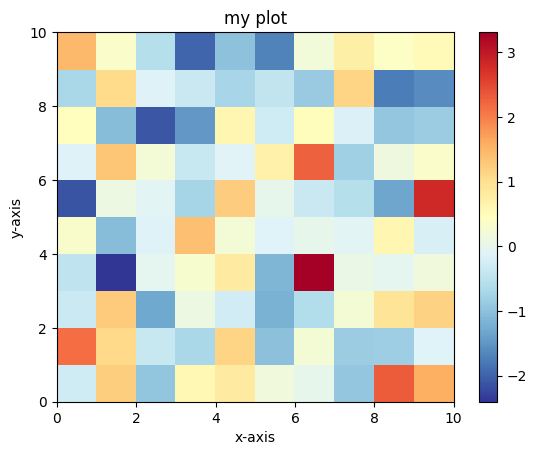

In [70]:
x = randn(10,10)
pcolor(x)
xlabel("x-axis")
ylabel("y-axis")
title("my plot")
colorbar();

# Custom types

In [71]:
using PyPlot
using Base

* Create a new type `ParamCovar` which represents an error covariance matrix
* It behaves like an Array of 2 dimensions

In [72]:
mutable struct ParamCovar{T} <: AbstractArray{T, 2} 
    n:: Int64       # dimension
    len:: T         # correlation length
    var:: T         # variance
    x:: Array{T,2}  # x[i,:] are the n coordinates of the i-th grid point
end

function Base.size(PC::ParamCovar)
    return (PC.n,PC.n)
end

function Base.getindex(PC::ParamCovar,i,j)
    d2 = sum((PC.x[i,:] - PC.x[j,:]).^2)
    return PC.var * exp(-d2 / (PC.len^2))
end

* Define a domain [-10,10] x [-10,10]

In [73]:
imax = 50
jmax = imax

vx1 = range(-10,stop=10,length=imax)
vx2 = range(-10,stop=10,length=jmax)

x1 = [x1 for x1 in vx1, x2 in vx2];
x2 = [x2 for x1 in vx1, x2 in vx2];

* create an instance of the `ParamCovar` type

In [74]:
n = length(x1)
m = 3

# n: number of grid points (total)
# len = 4 (correlation length)
# var = 1 (background variance)

# Pf = ParamCovar{Float64}(n,4.,1.,[x1[:] x2[:]]) or just
Pf = ParamCovar(n,4.,1.,[x1[:] x2[:]]);

* setup additional matrices (observation operator $\mathbf H$, observation error covariance matrix $\mathbf R$, forecast $\mathbf x_f$)

In [75]:
using SparseArrays, LinearAlgebra

# index of the middle of the domain
ind = LinearIndices(size(x1))[Int64(imax/2),Int64(jmax/2)]

1225

In [76]:
H = sparse([1,2,3],
           [1,ind,n], [1.,1.,1.], 3,n)

R = Diagonal([1,1,1])
yo = [1,-1,1]


xf = zeros(n);

* optimal interpolation

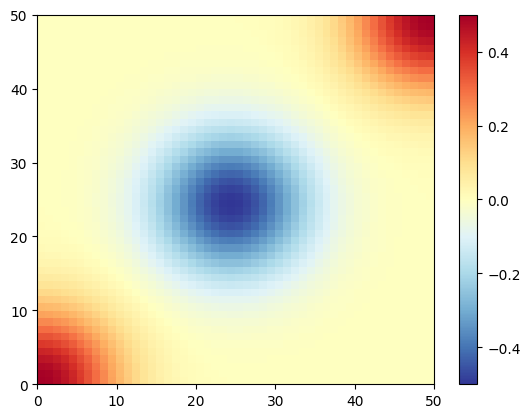

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd92f2c6550>

In [77]:
xa = xf + Pf * (H' * ((H*Pf*H' + R) \ (yo - H*xf)))

xa = reshape(xa,size(x1))
pcolor(xa)
colorbar()


# Parallel programming

* start julia with
  * `-p`: local machine
  * `--machinefile`:  cluster
* or use, e.g. `addprocs(4)` to use 4 workers


## Lower-level constructs

In [78]:
using Distributed
addprocs(4)

# process ID
@show myid()

# number of all process
@show nprocs()

# id of all workers
@show workers()

# run myid() on process 4
@show fetch(@spawnat 4 myid())

myid() = 1
nprocs() = 9
workers() = [2, 3, 4, 5, 6, 7, 8, 9]
fetch(#= In[78]:14 =# @spawnat(4, myid())) = 4


4

In [79]:
@everywhere heavy_computation(x) =  x.^5;
r = @spawn heavy_computation(2)
fetch(r)

r = @spawnat 2 heavy_computation(2)
fetch(r)

32

## Distributed arrays

In [80]:
@everywhere using DistributedArrays

y = distribute([1:10;])


# get data from worker 2-5
@show fetch(@spawnat 2 localpart(y))


function some_complex_work(y::DArray)
    return DArray(size(y),procs(y)) do I
        @show I[1]        
        return localpart(y).^2
    end
end

res = some_complex_work(y)
@show res

fetch(#= In[80]:7 =# @spawnat(2, localpart(y))) = [1, 2]
      From worker 5:	I[1] = 6:6
      From worker 4:	I[1] = 5:5
      From worker 2:	I[1] = 1:2
      From worker 3:	I[1] = 3:4
      From worker 9:	I[1] = 10:10
      From worker 8:	I[1] = 9:9
      From worker 6:	I[1] = 7:7
      From worker 7:	I[1] = 8:8
res = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


10-element DArray{Int64,1,Array{Int64,1}}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

* work with two distributed arrays

In [81]:
function some_complex_work2(y::DArray, z::DArray)
    return DArray(size(y),procs(y)) do I
        @show I
        localpart(y).^2 + localpart(z).^2
    end
end

z = distribute(2*[1:10;])

res = some_complex_work2(y,z)
@show res

      From worker 4:	I = (5:5,)
      From worker 5:	I = (6:6,)
      From worker 3:	I = (3:4,)
      From worker 2:	I = (1:2,)
      From worker 7:	I = (8:8,)
      From worker 6:	I = (7:7,)
      From worker 9:	I = (10:10,)
      From worker 8:	I = (9:9,)
res = [5, 20, 45, 80, 125, 180, 245, 320, 405, 500]


10-element DArray{Int64,1,Array{Int64,1}}:
   5
  20
  45
  80
 125
 180
 245
 320
 405
 500

In [82]:
function smoothing(y::DArray)
    return DArray(size(y),procs(y)) do I
        tmp = zeros(length(I[1])); 
        for i = I[1]
            if i > 1 && i < length(y)
                tmp[i - first(I[1]) + 1] = 0.1 * y[i-1] + 0.8 * y[i] + 0.1 * y[i+1]
            else
                tmp[i - first(I[1]) + 1] = y[i]
            end
        end
        return tmp
    end    
end

x = drandn(10)

10-element DArray{Float64,1,Array{Float64,1}}:
 -0.34215542025144896
 -0.32697781330446607
 -0.4139520661073632 
 -1.6626179229547537 
  0.6087951787781091 
 -1.5401589433606198 
 -0.8637421091325667 
 -1.1165608781666954 
  0.9185502418399736 
  0.3686350274087499 

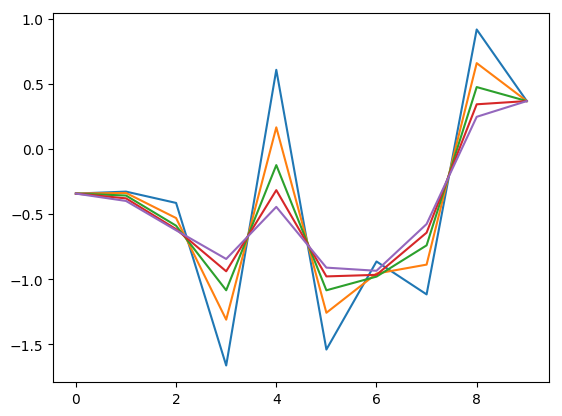

In [83]:
plot(x); 
xs = smoothing(x); plot(xs);
xs = smoothing(xs); plot(xs);
xs = smoothing(xs); plot(xs);
xs = smoothing(xs); plot(xs);


# Julia with SLURM (e.g. nic4,...)

* Use the package [ClusterManager](https://github.com/JuliaParallel/ClusterManagers.jl) for parallel processing
* Do not use the option `--machinefile` as it bypasses SLURM.
* A full example would be (`submit_julia.sh`):

```bash
#!/bin/bash
#SBATCH --job-name=julia
#SBATCH --output=output-%N-%j.out
#SBATCH --cpus-per-task=1

export script="$1"
echo Julia script $script

bt0=$(date +%s)

julia <<EOF
using ClusterManagers
addprocs(SlurmManager($SLURM_NTASKS))

# Test the connection
hosts = []
for i in workers()
    host, pid = fetch(@spawnat i (gethostname(), getpid()))
    push!(hosts, host)
end

@show hosts

# Run the script
include("$script")

# The Slurm resource allocation is released when all the workers have
# exited
for i in workers()
    rmprocs(i)
end
EOF

bt1=$(date +%s)

awk  " BEGIN { print \"Run time (hours): \",($bt1 - $bt0)/3600 } "
```

* The script can be used as:

```bash
sbatch --ntasks=2 --time=20:00:00 --mem-per-cpu=3000 --job-name=myjob submit_julia.sh /path/to/julia/script.jl
```

## Other nice features of Julia

* good document of the Julia language: http://docs.julialang.org/en/stable/
* find documentation from the julia REPL

In [84]:
apropos("Pearson")

Statistics.cor


In [94]:
using Statistics

In [95]:
?cor

search: cor Core acorr VecOrMat Vector factorial factorize Factorization



```
cor(x::AbstractVector)
```

Return the number one.

---

```
cor(X::AbstractMatrix; dims::Int=1)
```

Compute the Pearson correlation matrix of the matrix `X` along the dimension `dims`.

---

```
cor(x::AbstractVector, y::AbstractVector)
```

Compute the Pearson correlation between the vectors `x` and `y`.

---

```
cor(X::AbstractVecOrMat, Y::AbstractVecOrMat; dims=1)
```

Compute the Pearson correlation between the vectors or matrices `X` and `Y` along the dimension `dims`.


* get all field names of a type (introspection)

In [86]:
using SparseArrays
S = sparse([1,2],[1,2],[2,3]);
fieldnames(typeof(S))

(:m, :n, :colptr, :rowval, :nzval)

* Most of julia (the programming environement) is written in julia (the language). It is easy to find out where functions or operators are defined:

In [87]:
@which sparse([1,2],[1,2],[2,3])

sparse(I, J, V::AbstractArray{T,1} where T) in SparseArrays at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/SparseArrays/src/sparsematrix.jl:705

* List all functions with a given name (but operating on a different type)

In [88]:
using LinearAlgebra
methods(diag)

# 19 methods for generic function "diag":
[1] diag(B::BitArray{2}) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/bitarray.jl:80
[2] diag(M::SymTridiagonal) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/tridiag.jl:145
[3] diag(M::SymTridiagonal, n::Integer) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/tridiag.jl:145
[4] diag(M::Tridiagonal{T,V} where V<:AbstractArray{T,1}) where T in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/tridiag.jl:520
[5] diag(M::Tridiagonal{T,V} where V<:AbstractArray{T,1}, n::Integer) where T in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/tridiag.jl:520
[6] diag(A::LowerTriangular) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/triangular.jl:404
[7] diag(A::UnitLowerTriangular) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/triangular.jl:405
[8] diag(A::UpperTriangular) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/triangular.jl:406
[9] diag(A::UnitUpperTriangular) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/triangular.jl:407
[10] diag(D::Diagonal) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/diagonal.jl:445
[11] diag(D::Diagonal, k::Integer) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/diagonal.jl:445
[12] diag(M::Bidiagonal) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/bidiag.jl:294
[13] diag(M::Bidiagonal, n::Integer) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/bidiag.jl:294
[14] diag(A::SparseMatrixCSC{Tv,Ti}) where {Tv, Ti} in SparseArrays at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/SparseArrays/src/sparsematrix.jl:3321
[15] diag(A::SparseMatrixCSC{Tv,Ti}, d::Integer) where {Tv, Ti} in SparseArrays at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/SparseArrays/src/sparsematrix.jl:3321
[16] diag(A::AbstractArray{T,1} where T) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/generic.jl:320
[17] diag(A::AbstractArray{T,2} where T) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/dense.jl:246
[18] diag(A::AbstractArray{T,2} where T, k::Integer) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/dense.jl:246
[19] diag(F::SuiteSparse.CHOLMOD.Factor{Tv}) where Tv in SuiteSparse.CHOLMOD at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/SuiteSparse/src/cholmod.jl:1735

* integrated package manager

```julia
Pkg.add("DataAssim")
```

* Have a look at: http://pkg.julialang.org/

* Easy to write documentation in markdown
* Support for jupyter
* Easy to use with github, travis-ci, codecov.io
* Support of macros (function that can transform your code)
* Numerous constructs to avoid copying data
  * pass argument by reference instead of by value
  * `reshape` gives a different view on the data
  * `SubArray` ` 


In [89]:
A = [1 2 3; 4 5 6];
@show A
b = view(A,:,1)
@show b
b[1] = 100
@show A

A = [1 2 3; 4 5 6]
b = [1, 4]
A = [100 2 3; 4 5 6]


2×3 Array{Int64,2}:
 100  2  3
   4  5  6

* list comprehension

In [90]:
A = [sin(π * x) for x = 0:0.2:1]

6-element Array{Float64,1}:
 0.0                   
 0.5877852522924731    
 0.9510565162951535    
 0.9510565162951536    
 0.5877852522924732    
 1.2246467991473532e-16

In [91]:
A = [sin(π * x) * sin(π * y) for x = 0:0.2:1, y = 0:0.2:1]

6×6 Array{Float64,2}:
 0.0  0.0          0.0          0.0          0.0          0.0        
 0.0  0.345492     0.559017     0.559017     0.345492     7.19829e-17
 0.0  0.559017     0.904508     0.904508     0.559017     1.16471e-16
 0.0  0.559017     0.904508     0.904508     0.559017     1.16471e-16
 0.0  0.345492     0.559017     0.559017     0.345492     7.19829e-17
 0.0  7.19829e-17  1.16471e-16  1.16471e-16  7.19829e-17  1.49976e-32

* do you like shell pipes? (in DIVA 1081 shell pipes for 154 scripts)

In [92]:
[1:5;]  |> x->x.^2 |> x-> x[x .> 2] |> sum

54

* Support for GPU programming with GPUArray.jl, CuArray.jl and CUDAnative.jl
* Interesting read: [A Journey Through Julia: A dynamic and fast language](http://hdl.handle.net/2268/203491) from Thibaut Cuvelier

# Caveats

* Plotting data with missing values is/was not as straight-foreward as in Matlab/Octave. Now PyPlot ignored NaNs as in Matlab/Octave
* It takes some time to compile/recompile modules  (which can be a bit annoying in interactive use)
* Still a young language
